# Exercise 3

Problem 1 : Analysis of Numeric Variables
Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.
Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [5]:
print(houseNumData.dtypes)
houseNumData.head()

LotArea        int64
GrLivArea      int64
TotalBsmtSF    int64
GarageArea     int64
SalePrice      int64
dtype: object


,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


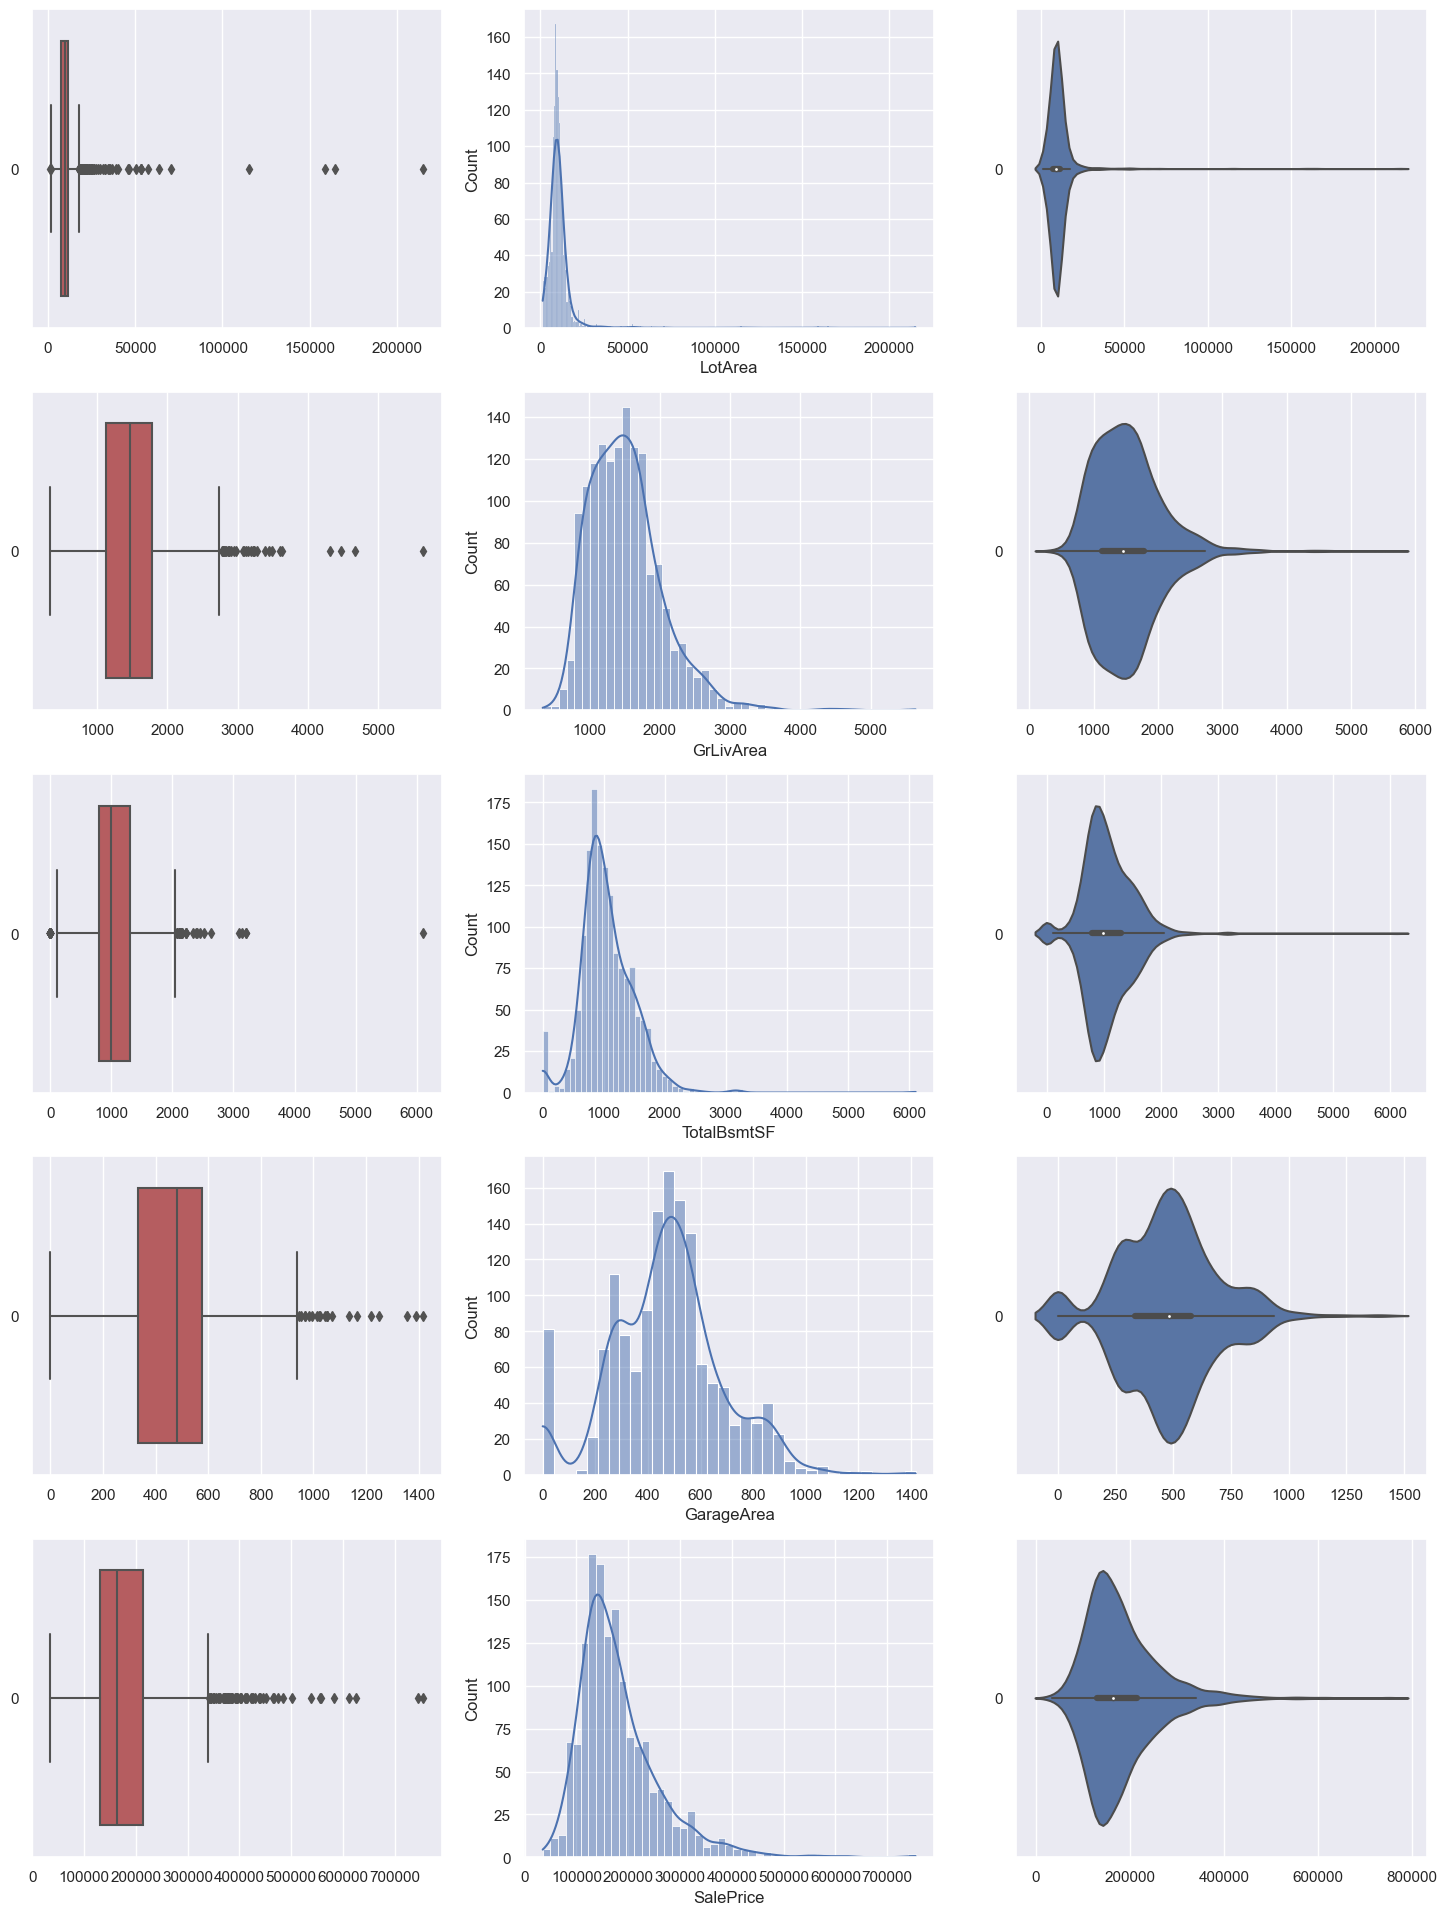

In [6]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", color = "r", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], kde=True , ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

b) Discuss with your friends if the distributions look like “Normal Distribution”. Which one has maximum outliers?

c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap.Discuss with 
your friends and determine which of the variables has the strongest correlation with “SalePrice”. Is it useful?

<Axes: >

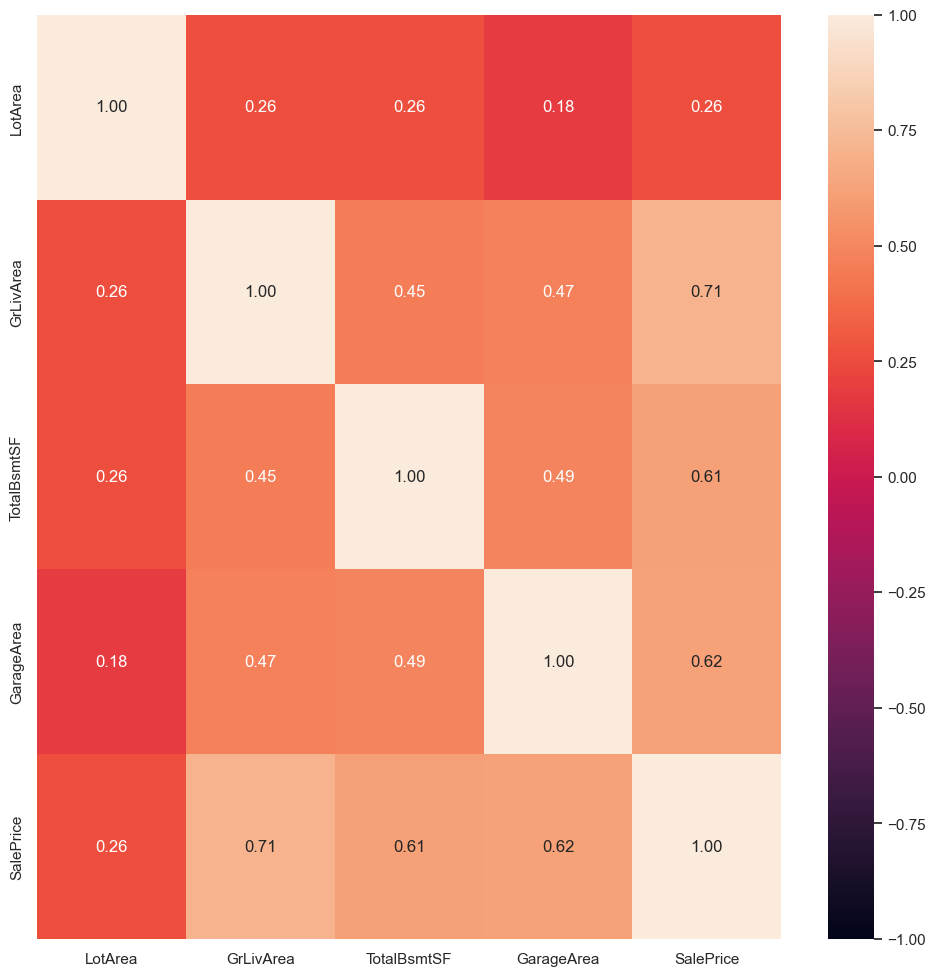

In [7]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Discuss with your 
friends and determine which of the variables has the strongest linear relation with “SalePrice”. Is it useful?


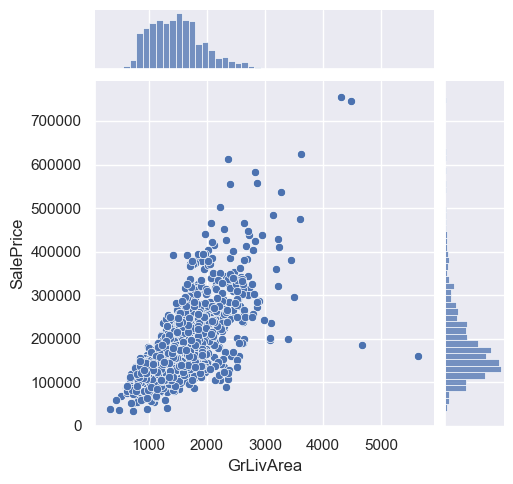

In [8]:
sb.jointplot(data = houseNumData, x = "GrLivArea", y = "SalePrice", height = 5)

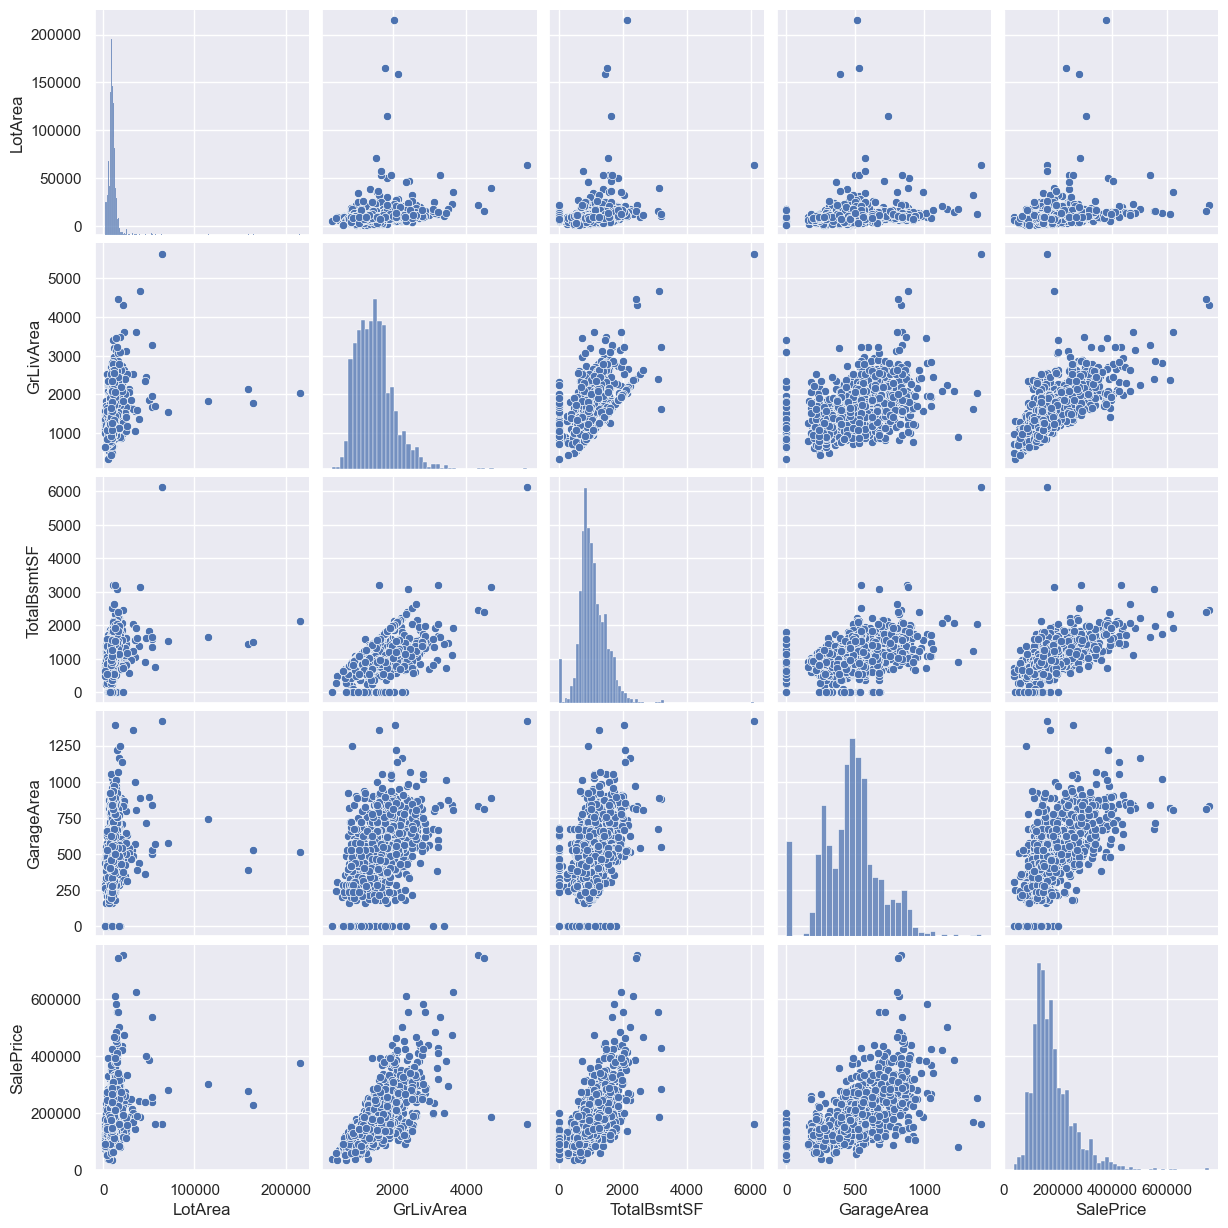

In [9]:
sb.pairplot(data = houseNumData)

Problem 2 : Statistical Summary
Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame.
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [10]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [11]:
print(houseCatData.dtypes)
houseCatData.head()

MSSubClass       int64
Neighborhood    object
BldgType        object
OverallQual      int64
dtype: object


,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).


In [12]:
houseCatData = houseCatData.astype('category')

In [13]:
print(houseCatData.dtypes)

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object


b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

Number of MSSubClass : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


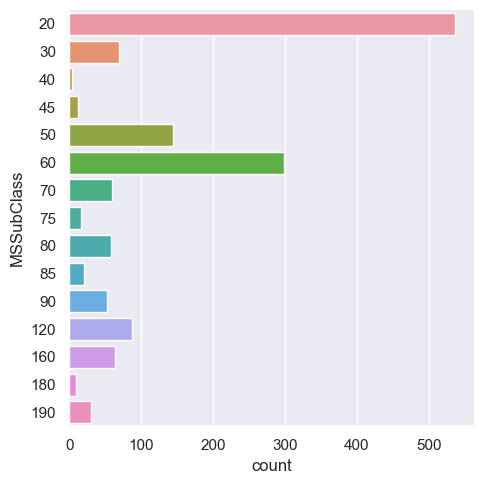

In [14]:
# MSSubClass in the Dataset
print("Number of MSSubClass :", len(houseCatData["MSSubClass"].unique()))

# No. of each MSSubClass
print(houseCatData["MSSubClass"].value_counts())
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", height = 5)

Number of Neighborhood : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


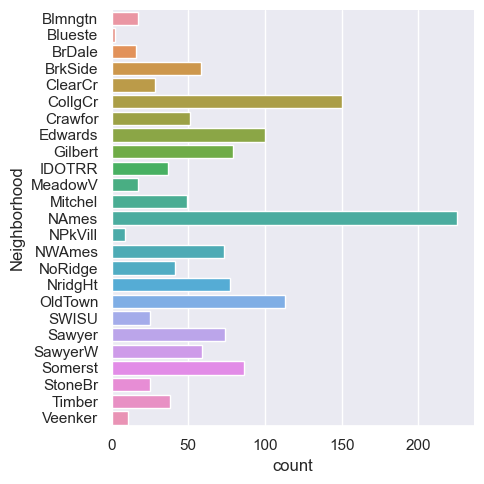

In [15]:
# Neighborhood in the Dataset
print("Number of Neighborhood :", len(houseCatData["Neighborhood"].unique()))

# No. of each Neighborhood
print(houseCatData["Neighborhood"].value_counts())
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", height = 5)

Number of BldgType : 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


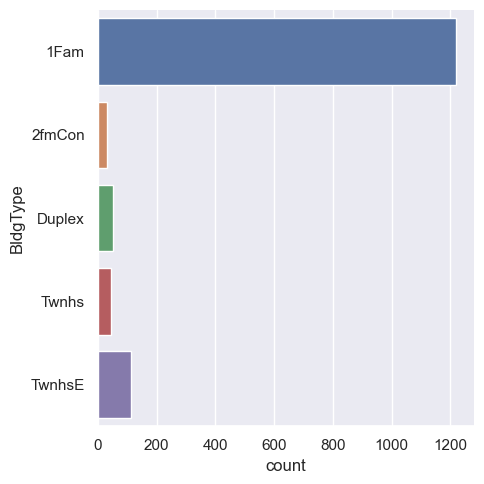

In [16]:
# BldgType in the Dataset
print("Number of BldgType :", len(houseCatData["BldgType"].unique()))

# No. of each BldgType
print(houseCatData["BldgType"].value_counts())
sb.catplot(y = "BldgType", data = houseCatData, kind = "count", height = 5)

Number of OverallQual : 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


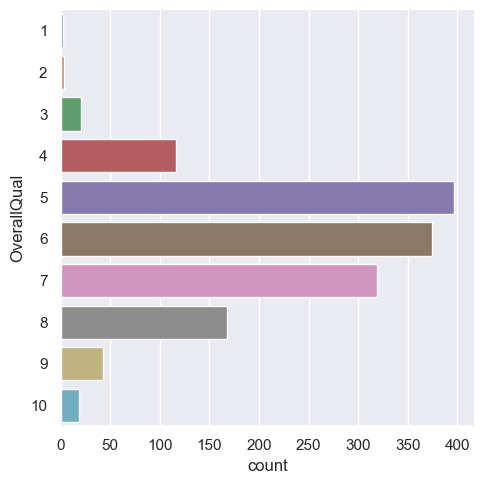

In [17]:
# OverallQual in the Dataset
print("Number of OverallQual :", len(houseCatData["OverallQual"].unique()))

# No. of each OverallQual
print(houseCatData["OverallQual"].value_counts())
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count", height = 5)

c) Check the relationship amongst the variables using bi-variate heatmap of counts. Discuss with your friends and 
see if you can figure any intuitive relationship of “OverallQual” with the other three variables? Is this useful?

<Axes: xlabel='MSSubClass', ylabel='BldgType'>

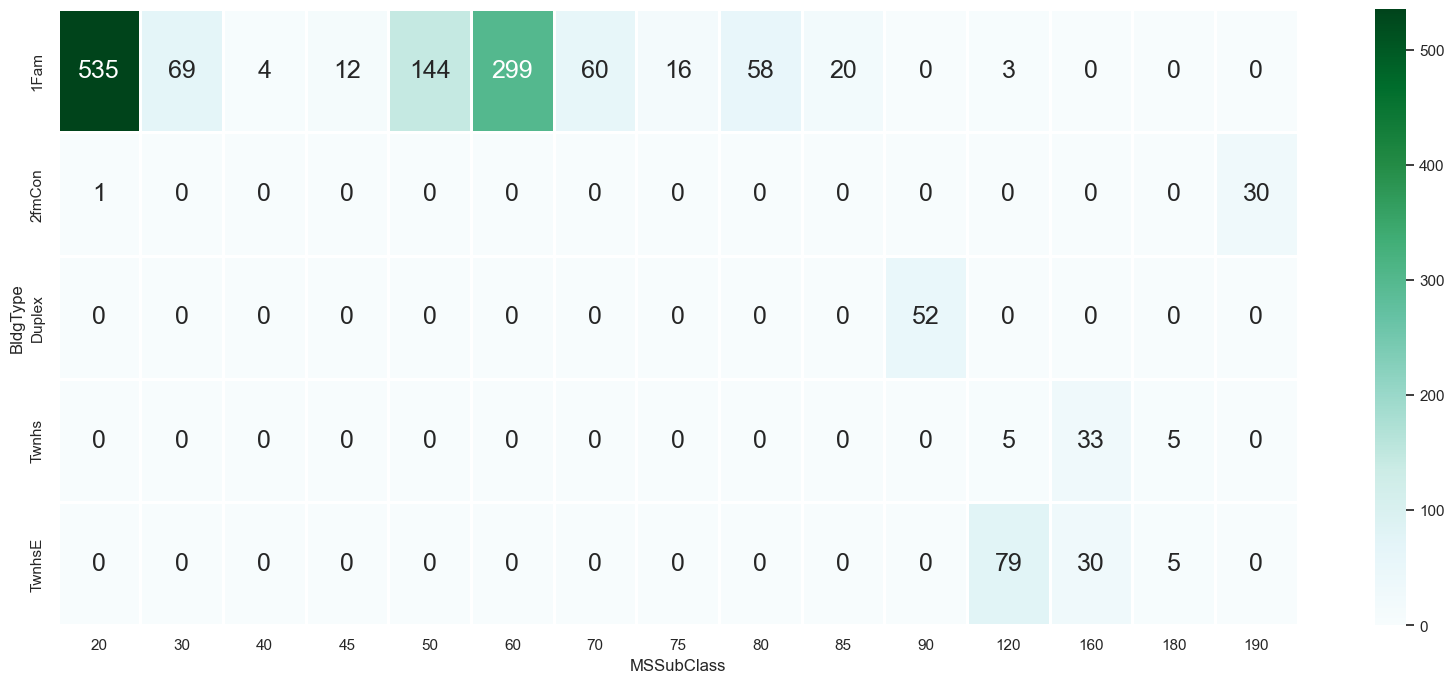

In [18]:
# Distribution of BldgType across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='MSSubClass', ylabel='OverallQual'>

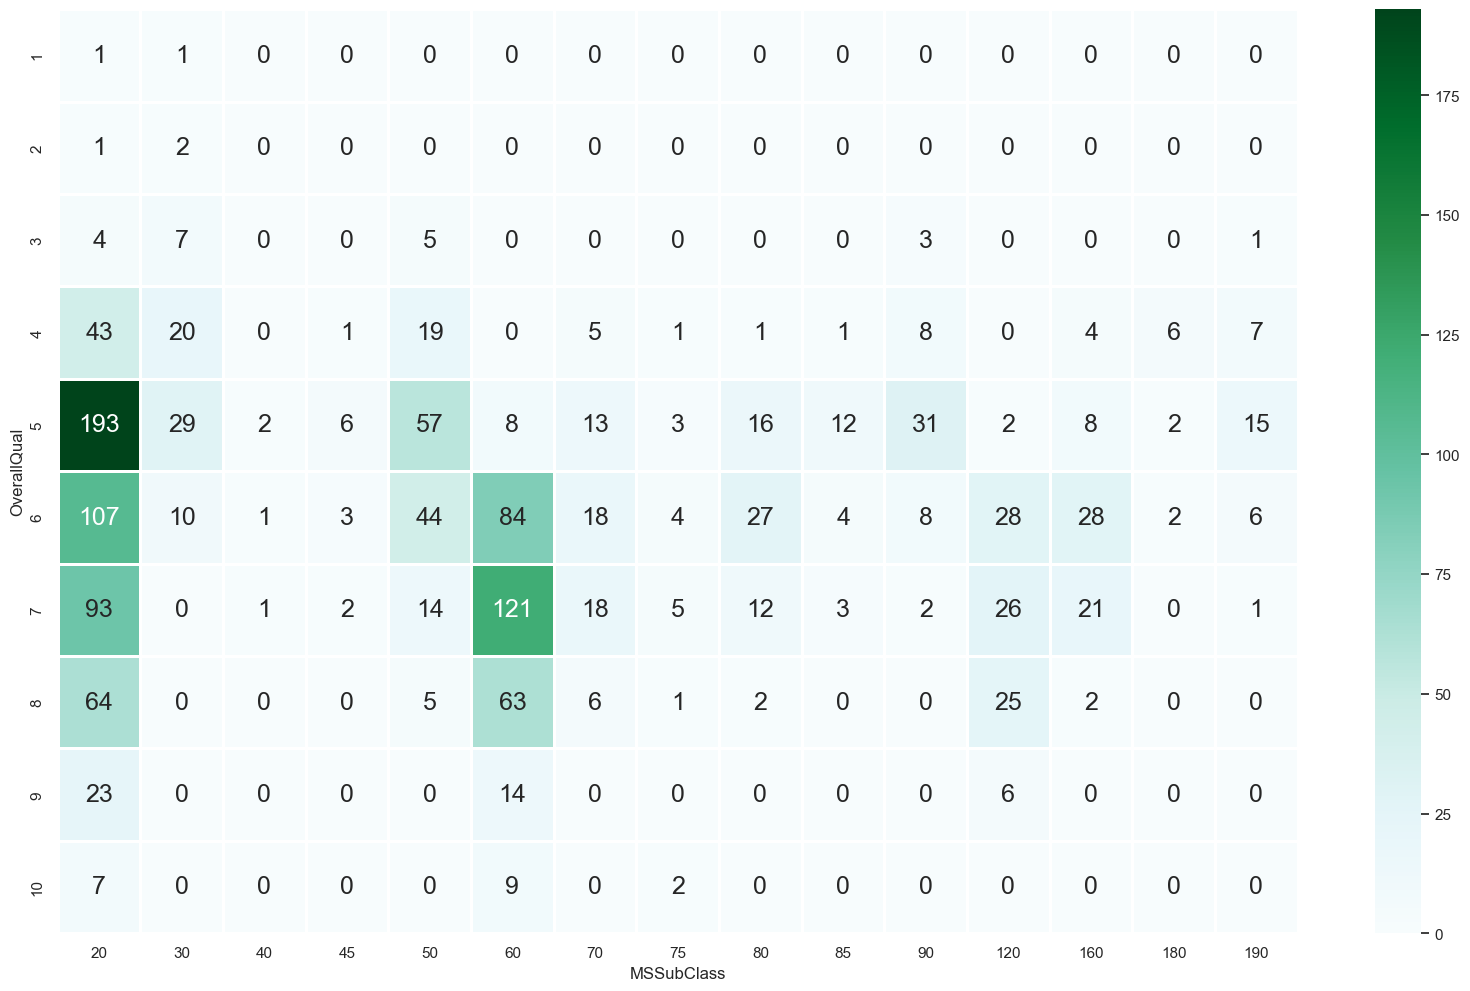

In [19]:
# Distribution of OverallQual across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Neighborhood', ylabel='OverallQual'>

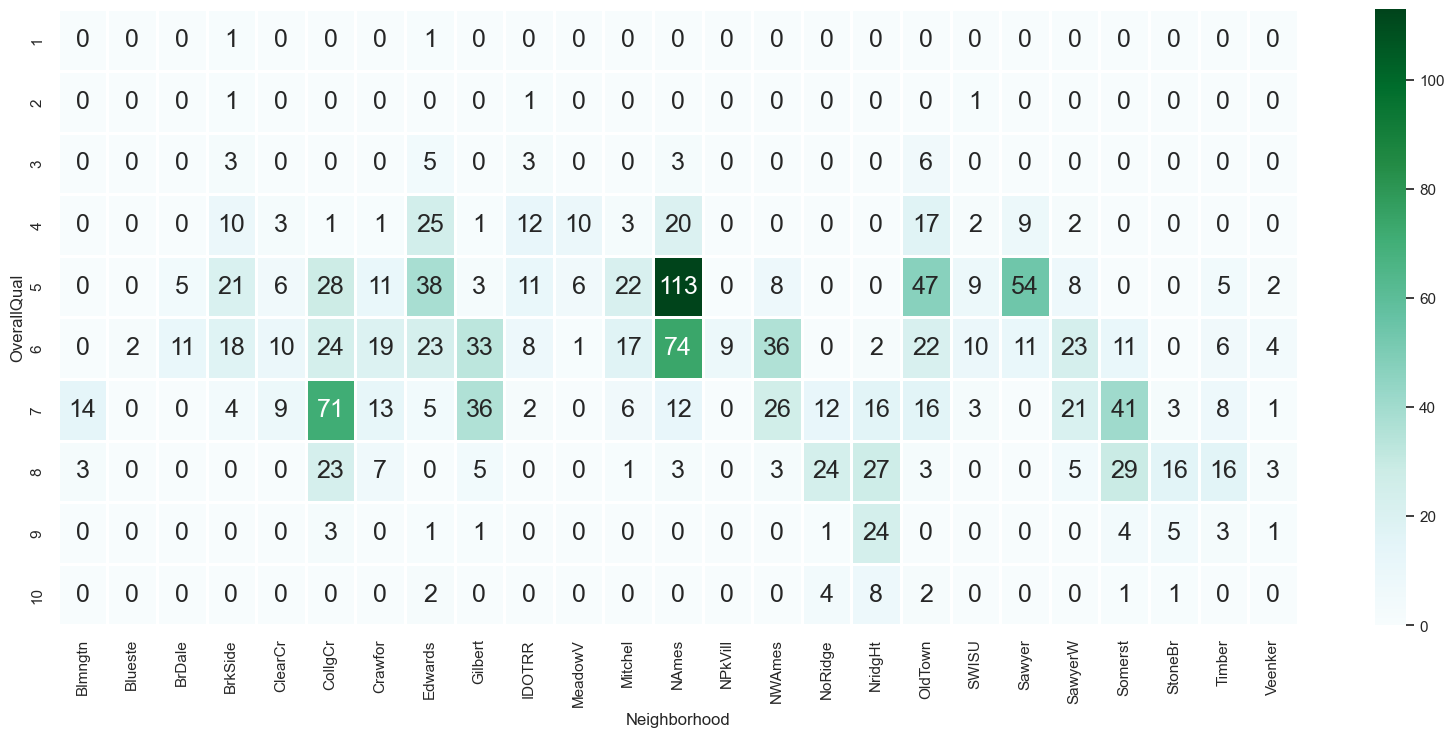

In [20]:
# Distribution of OverallQual across Neighborhood
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='BldgType', ylabel='OverallQual'>

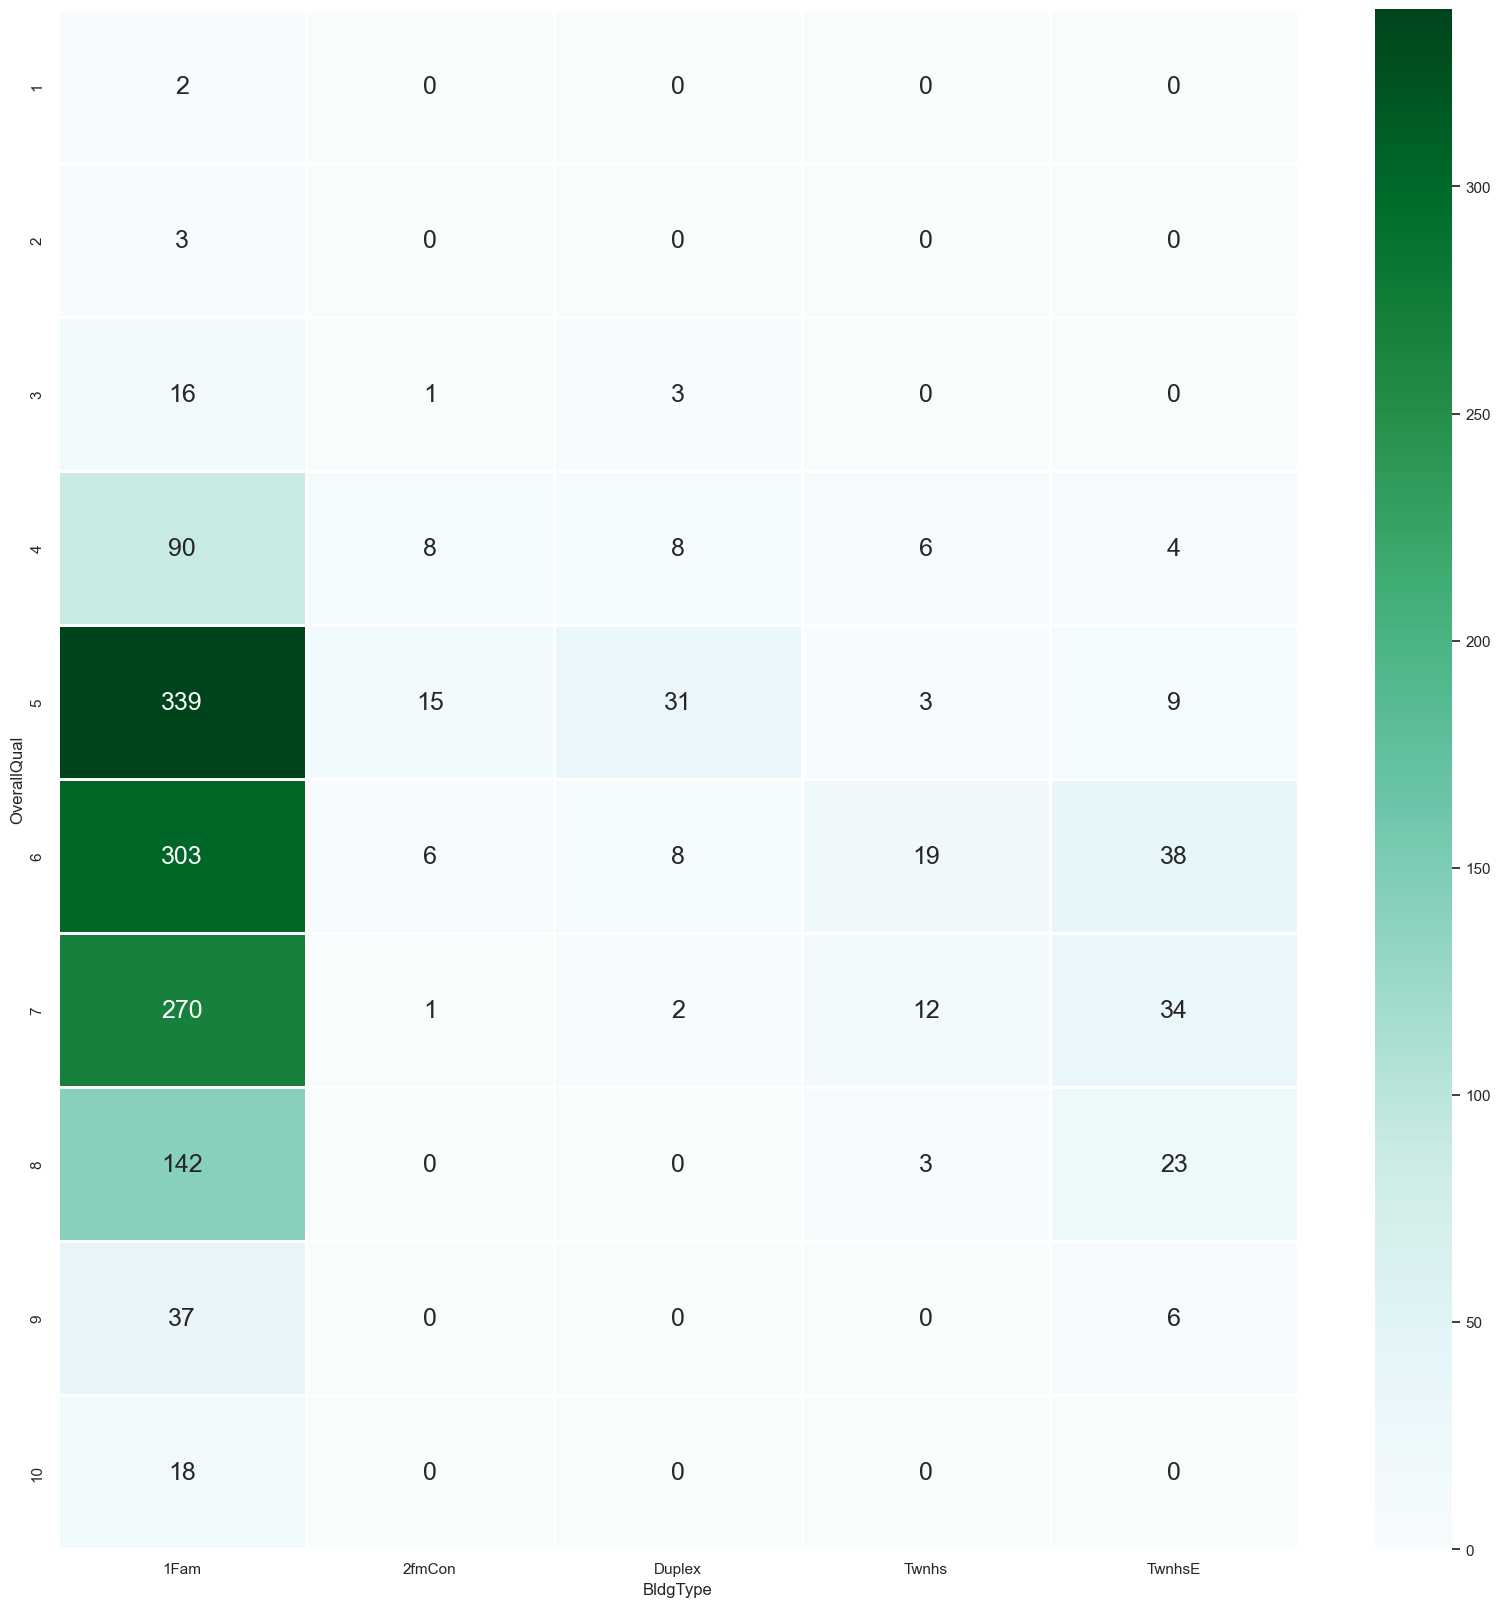

In [21]:
# Distribution of OverallQual across BldgType
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

d) Draw boxplots of “SalePrice” against each of these categorical variables. Discuss with your friends and find out 
if you see any pattern in these boxplots. Which of these variables has the strongestrelationship with “SalePrice”?

Create a joint DataFrame by concatenating `SalePrice` to `houseCatData`.   

In [22]:
saleprice = pd.DataFrame(houseData['SalePrice'])
houseCatSale = pd.concat([houseCatData, saleprice], axis = 1)
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


Check the distribution of `SalePrice` across different `MSSubClass`.

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

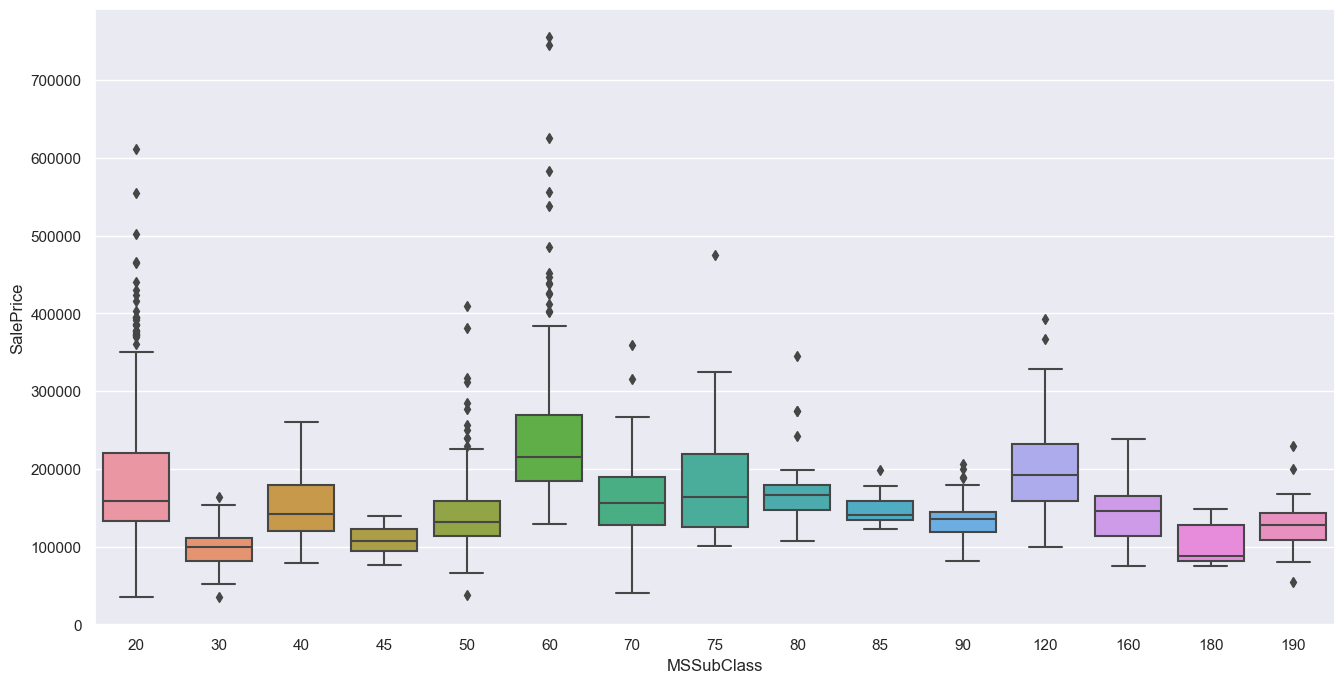

In [24]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `Neighborhood`.

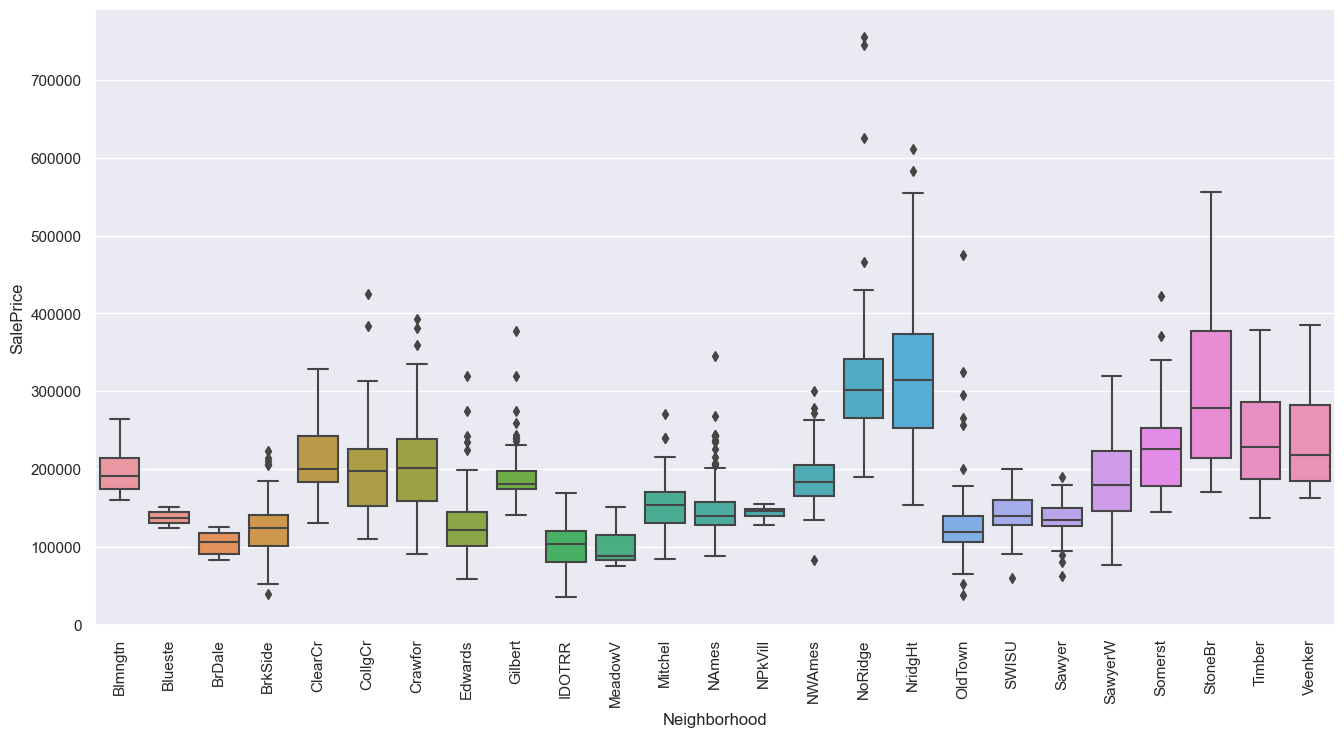

In [25]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)
plt.xticks(rotation=90);

Check the distribution of `SalePrice` across different `BldgType`.

<Axes: xlabel='BldgType', ylabel='SalePrice'>

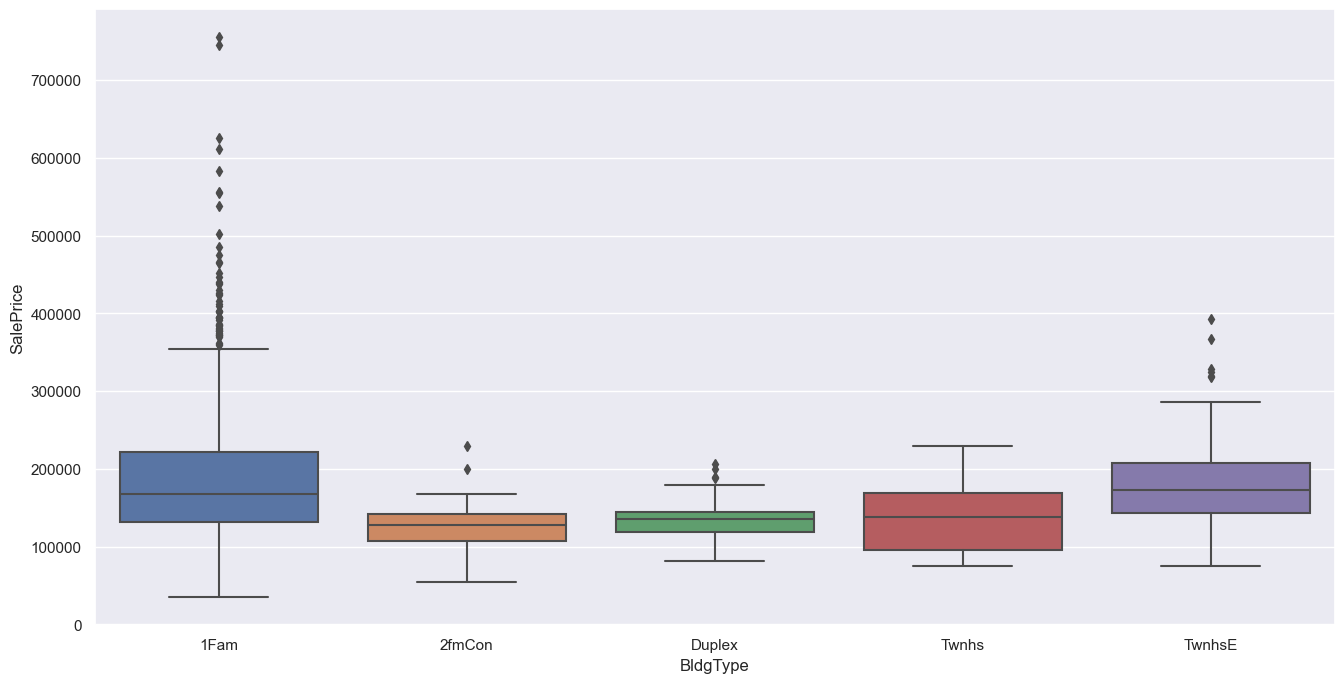

In [26]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `OverallQual`.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

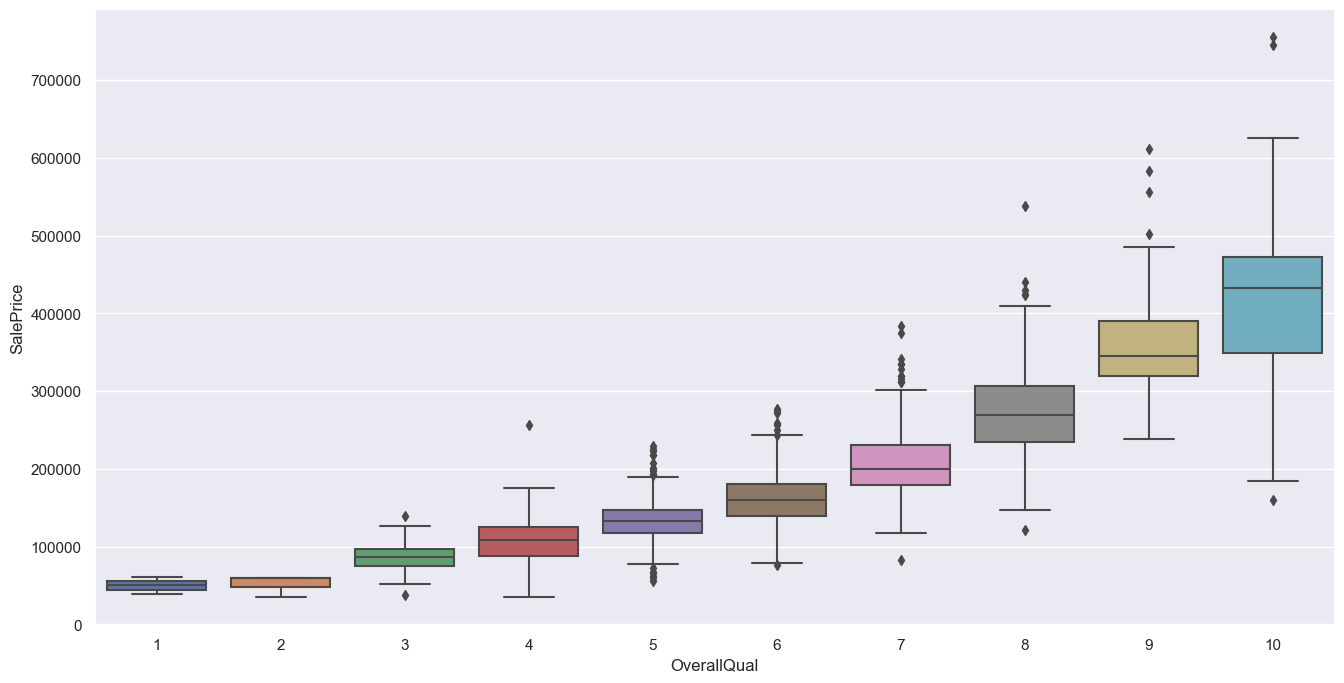

In [27]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   

Bonus : Attempt a comprehensive analysis with all *Categorical* variables in the dataset.